### Data  Wrangling

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('MARIN_FREE_KVLCC2_zz_-20_m.csv')

# 1. 绘制热力图
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 获取每个特征与目标变量 'nps(RPM)' 的相关性
correlation_with_target = correlation_matrix['nps(RPM)'].sort_values(ascending=False) 
print(correlation_with_target)

# 2. 绘制箱线图
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)  # 3行4列的子图布局
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# 3. 两两列之间绘制散点图
for (col1, col2) in combinations(columns, 2):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[col1], data[col2])
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid()
    plt.show()



ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### Random Forrest to evaluate the importance of each Feature

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 准备特征和目标变量
X = data.drop(columns=['nps(RPM)'])
y = data['nps(RPM)']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练随机森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 获取特征重要性
feature_importances = rf.feature_importances_

# 将特征名与重要性评分结合
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 输出特征重要性
print(feature_importance_df)


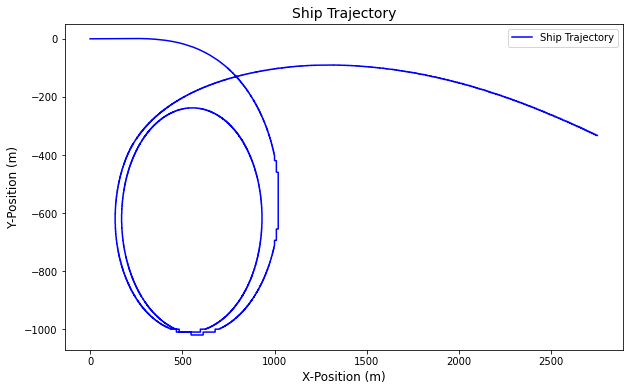

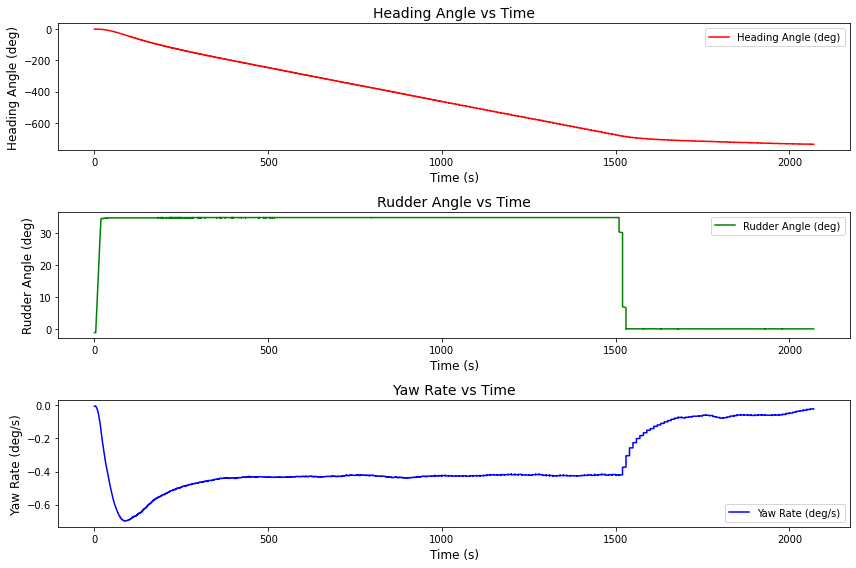

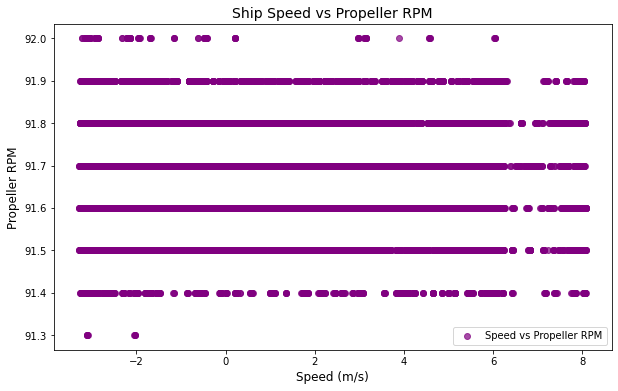

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file_path = 'MARIN_FREE_KVLCC2_tc_35_m.csv'  # 替换为您文件的路径
data = pd.read_csv(file_path)

# 绘制船舶轨迹
plt.figure(figsize=(10, 6))
plt.plot(data['x-position(m)'], data['y-position(m)'], label='Ship Trajectory', color='b')
plt.title('Ship Trajectory', fontsize=14)
plt.xlabel('X-Position (m)', fontsize=12)
plt.ylabel('Y-Position (m)', fontsize=12)
plt.legend()
plt.show()

# 绘制航向角、舵角、偏航角速度随时间的变化
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(data['time(s)'], data['heading angle(deg)'], label='Heading Angle (deg)', color='r')
plt.title('Heading Angle vs Time', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Heading Angle (deg)', fontsize=12)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['time(s)'], data['rudder angle(deg)'], label='Rudder Angle (deg)', color='g')
plt.title('Rudder Angle vs Time', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Rudder Angle (deg)', fontsize=12)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['time(s)'], data['yaw(deg/s)'], label='Yaw Rate (deg/s)', color='b')
plt.title('Yaw Rate vs Time', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Yaw Rate (deg/s)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# 绘制船速与螺旋桨转速的关系
plt.figure(figsize=(10, 6))
plt.scatter(data['u(m/s)'], data['nps(RPM)'], label='Speed vs Propeller RPM', color='purple', alpha=0.7)
plt.title('Ship Speed vs Propeller RPM', fontsize=14)
plt.xlabel('Speed (m/s)', fontsize=12)
plt.ylabel('Propeller RPM', fontsize=12)
plt.legend()
plt.show()


In [6]:
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# 1. 数据概览
speed = data['u(m/s)']
rpm = data['nps(RPM)']

# 计算相关性
correlation = np.corrcoef(speed, rpm)[0, 1]
print(f"螺旋桨转速与船速的相关性系数：{correlation:.3f}")

# 2. 可视化散点图及拟合曲线
plt.figure(figsize=(10, 6))
sns.scatterplot(x=speed, y=rpm, label='Data Points', color='blue', alpha=0.6)
sns.regplot(x=speed, y=rpm, scatter=False, label='Linear Fit', color='red')
plt.title('Propeller RPM vs Ship Speed', fontsize=14)
plt.xlabel('Speed (m/s)', fontsize=12)
plt.ylabel('Propeller RPM', fontsize=12)
plt.legend()
plt.show()

# 3. 线性回归模型
slope, intercept, r_value, p_value, std_err = linregress(speed, rpm)

# 打印回归模型参数
print(f"线性回归模型：RPM = {slope:.3f} * Speed + {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject